Read the well-log data `data.in` and produce three model files to be used in modeling:
- A log sampled every i-th layer
- A log after the backus average
- A homogeneous model to subtract the direct wave

In [1]:
import numpy as np
import bruges as br #pip install bruges
import matplotlib.pyplot as plt
%matplotlib inline

# free surface flag
FS = '0'

In [2]:
# read data in
with open('data.in') as f:
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])
    array = np.array(array)

In [3]:
h = np.diff(array[:,0])
# set the first thickness (depth of the first boundary)
h[0] = 800
# add the last thickness (half-space)
h = np.append(h,0)

vp, vs, den = array[:,1:4].T

In [4]:
# Assign attenuation parameters (isotropic linear solid)
qp = 9999
qs = 9999
wc = 20

qp = np.full((np.shape(vp)[0]),qp)
qs = np.full((np.shape(vp)[0]),qs)
wc = np.full((np.shape(vp)[0]),wc)

# combine in a single matrix
out = np.transpose(np.matrix([den, vp, vs, qp, qs, wc, h]))

In [5]:
# sample every i-th layer to reduce the number of layers for computation efficiency 
sampling = 10
out = out[0::int(sampling),:]

# scale the individual layer thickness to keep roughly the same total thickness
out[1:,-1] *= sampling

In [6]:
# write to file full log
fname = './well1/medium.txt'

with open(fname,'w') as f:
    f.write(FS+'\n')
with open(fname,'ab') as f:
    for line in out:
        np.savetxt(f, line, fmt='%.5f')

In [7]:
# write to file one layer
fname = './well2/medium.txt'

with open(fname,'w') as f:
    f.write(FS+'\n')
with open(fname,'ab') as f:
    for line in out[0,:]:
        np.savetxt(f, line, fmt='%.5f')
        np.savetxt(f, line, fmt='%.5f')

In [6]:
# Backus average the log using a window of length l
l = 20
[vpToB, vsToB, rhoToB] = [np.ndarray.flatten(np.array(out[1:,1])),np.ndarray.flatten(np.array(out[1:,2])),np.ndarray.flatten(np.array(out[1:,0]))]

vpB, vsB, rhoB = br.rockphysics.backus(vpToB,vsToB,rhoToB,l,np.matrix.mean(out[1:,-1]))

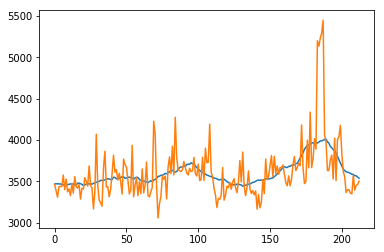

In [7]:
# plot Backus-averaged and the original log
plt.plot(vpB)
plt.plot(out[1:,1])

In [49]:
out[1:,0] = np.array([rhoB]).T
out[1:,1] = np.array([vpB]).T
out[1:,2] = np.array([vsB]).T

In [50]:
# write to file
fname = './well_backus/medium.txt'

with open(fname,'w') as f:
    f.write(FS+'\n')
with open(fname,'ab') as f:
    for line in out:
        np.savetxt(f, line, fmt='%.5f')